Importing Python packages for analyzing the data, especially pandas for data analysis and matplotlib for visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


Installing textblob.

In [4]:
!pip install textblob

In [5]:
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset
Then we read the dataset file which is in csv format and display first 5 rows.

In [6]:
df=pd.read_csv("UScomments.csv",encoding='utf8',error_bad_lines=False)
df.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [7]:
df.shape

(691400, 4)

In [8]:
df.ndim

2

In [9]:
df.size

2765600

In [10]:
df.keys

<bound method NDFrame.keys of            video_id                                       comment_text likes  \
0       XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1       XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2       XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3       XpVt6Z1Gjjo                                MY FAN . attendance     3   
4       XpVt6Z1Gjjo                                         trending 😉     3   
...             ...                                                ...   ...   
691395  EoejGgUNmVU                                             Лучшая     1   
691396  EoejGgUNmVU  qu'est ce que j'aimerais que tu viennes à Roan...     0   
691397  EoejGgUNmVU                          Ven a mexico! 😍 te amo LP     0   
691398  EoejGgUNmVU                                    Islığı yeter...     0   
691399  EoejGgUNmVU  Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...     0   

       re

In [11]:
df.describe()

,video_id,comment_text,likes,replies
count,691400,691375,691400,691400
unique,2266,434076,1284,479
top,WYYvHb03Eog,Lol,0,0
freq,800,310,456894,525730


In [12]:
df.dtypes

video_id        object
comment_text    object
likes           object
replies         object
dtype: object

In [13]:
df.isnull()

,video_id,comment_text,likes,replies
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
691395,False,False,False,False
691396,False,False,False,False
691397,False,False,False,False
691398,False,False,False,False


In [14]:
df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [15]:
#Extracting 2000 random samples from the data
comm = df.sample(2000)
comm.shape

(2000, 4)

Calculating sentiment analysis for each comment.

In [16]:
#Calculating the Sentiment Polarity
pol=[] # list which will contain the polarity of the comments
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

Adding Sentiment Polarity to the data

In [17]:
#Adding the Sentiment Polarity column to the data
comm['pol']=pol

Converting the polarity values from continuous to categorical

In [18]:
#Converting the polarity values from continuous to categorical
comm['pol'][comm.pol==0]= 0
comm['pol'][comm.pol > 0]= 1
comm['pol'][comm.pol < 0]= -1

Displaying Positive comments.

In [19]:
#Displaying the POSITIVE comments
df_positive = comm[comm.pol==1]
df_positive.head(20)

,video_id,comment_text,likes,replies,pol
58721,gzh6tcMsyoQ,I love the sushi pillow :D,20,0,1.0
49453,_ANP3HR1jsM,I love those hats!!,0,0,1.0
40691,6z-X4r5JkyI,"They're such opposites, I absolutely love it",0,0,1.0
82453,FfRGxN2zeWU,"Ohhh Angelika ,you make us happy with tearing ...",1,0,1.0
372206,jmc7aUVKCMA,Musk is full of shit he hasn't even launched a...,0,0,1.0
361374,aTF84_CqzxQ,I liked the part with the dog.,131,1,1.0
41180,ZQK1F0wz6z4,JOANNA! Forever the best Emma Woodhouse <3,0,0,1.0
494863,pXFIMdJduvY,I love this song,0,0,1.0
635535,vxl7glJMKOQ,"might be good to use more safety gear, gloves ...",0,0,1.0
102234,5fsEPf_Uuao,do more diy videos please,0,0,1.0


Displaying Negative comments.

In [20]:
#Displaying the NEGATIVE comments
df_positive = comm[comm.pol==-1]
df_positive.head(20)

,video_id,comment_text,likes,replies,pol
248049,Z8aN5L-oDOw,So my phone randomly fried it's self what??!😂😂😭,1,0,-1.0
409568,fJiaYnmUw60,You've got the wrong guy man! I'm just some d...,0,0,-1.0
103955,pe3KSYqPIgo,matpat..... see what u don't understand is we ...,0,0,-1.0
406821,w58C1Vu10Is,"This got 97k likes? WTF, those people are simp...",0,0,-1.0
277825,ao21eJgsF1w,Afraid of iphone,0,0,-1.0
412053,a2VRtAFqb4U,Can the coat hook hold a dead body?,0,0,-1.0
224694,hNsUtZmWgdg,LM slogan: 'We never forget who we are working...,9,20,-1.0
211685,TNhyrPaGFYQ,#YIAYbasic I fucked a bar of soap once... that...,1,0,-1.0
443984,FN5n87Gj0LM,Warning! Game of Thrones spoiler alert. Almost...,0,0,-1.0
673096,9gpjRy3uDUM,"The IDIOT will NOT answer my emails, ... proba...",0,0,-1.0


Displaying Neutral comments.

In [21]:
#Displaying the NEUTRAL comments
df_positive = comm[comm.pol==0]
df_positive.head(20)

,video_id,comment_text,likes,replies,pol
462698,qJVOPnfywCk,waoouuu fantastico¡,1,0,0.0
32016,4LwpGaDKmZ8,get away from rihanna u racist roach,0,0,0.0
254415,ao21eJgsF1w,it was probably the dirt and sand in the sea,0,0,0.0
192697,evvVtqmvE5w,😱😱🤤😱😱😱😱,0,0,0.0
455610,9VQh4wJ76Dc,its a total steal!,6,0,0.0
655724,bu9e410C__I,I see Jonathan from Stranger Things\nAlrighty,0,0,0.0
462656,qJVOPnfywCk,Can u do a tutorial on valak the conjurning 2 ...,0,0,0.0
70404,MeGyZJiB-FQ,Is he purposing ?,0,0,0.0
234709,H0okA2gPt_Q,Go Rams!,0,0,0.0
94811,Uc32z-wgxU4,Narrated by Jonny Ive 😂,0,0,0.0


Calculating the count of Positive, Negative & Neutral comments

 1.0    912
 0.0    767
-1.0    321
Name: pol, dtype: int64

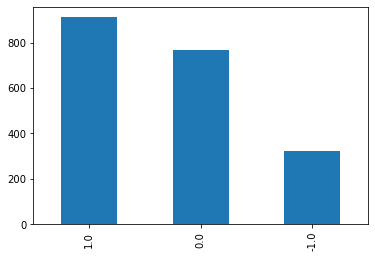

In [22]:
comm.pol.value_counts().plot.bar()
comm.pol.value_counts()